Compute the $L_2$ gain of a system $G$ using the LMI formulation of the Bounded Real Lemma

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import control as ct
    

System definition

In [2]:

A = np.array([[1.505, 4, 0],
              [-5, -1, 2],
              [0.2, -2, -1]])
B = np.array([[1,0],
              [0,1],
              [0,0]])
C = np.array([[1,0,0],
              [0,0,1]])
D = np.array([[0,0],
              [0,0]])

G = ct.ss(A,B,C,D)

n = np.size(A,1)
m = np.size(D.transpose()@D,1)

Construct the Bounded Real Lemma LMI problem

In [3]:
P = cp.Variable([n,n], symmetric=True)

# L_2 gain squared
gamma2 = cp.Variable()

# Objective function
objective = cp.Minimize(gamma2)

# Bounded real lemma constraints: note the block matrix construction using cp.bmat
boundedreal = cp.bmat([ [A.T @ P + P @ A + C.T @ C , P @ B + C.T @ D],
                        [B.T @ P + D.T @ C , -gamma2*np.eye(m) + D.T @ D] ])

constraints = [  P >> 0,
                 boundedreal << 0 ]

# Define problem object
prob = cp.Problem(objective, constraints)

# Solve
result = prob.solve()

Check the result

In [4]:
if prob.status == 'optimal':
    display("The L_2 gain of G is", np.sqrt(gamma2.value))
else:
    display("G is not L_2 stable")
    

'The L_2 gain of G is'

3086.901543156224

If the $L_2$ gain is finite, check that it is equal to $\|G\|_\infty=\sup_{\omega} \overline\sigma(j\omega)$ via a singular value plot

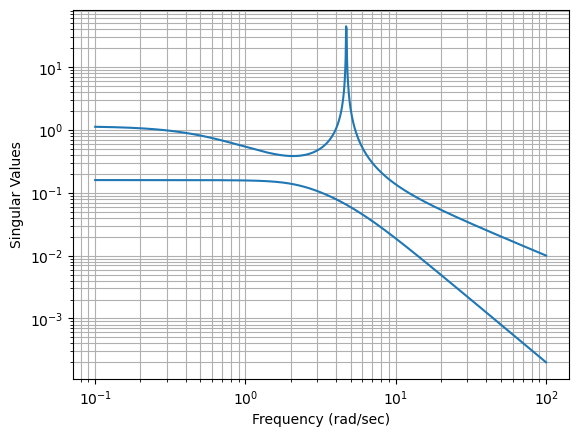

In [5]:
if prob.status == 'optimal':
    # Frequency grid
    omega = np.logspace(-1, 2, 1000)
    # Plot figure
    ct.freqplot.singular_values_plot(G, omega);